#### Neste notebook vai ser visto como salvar vídeos utilizando openCV

In [1]:
#importação das bibliotecas
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [2]:
#Baixando e descompactando os arquivos da aula
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [4]:
#especificando a fonte que no caso é um caminho no disco
source = 'race_car.mp4'  
cap = cv2.VideoCapture(source)

In [5]:
#verificando se deu certo
if not cap.isOpened():
    print("Error opening video stream or file")

In [6]:
#lendo os frames do vídeo
ret, frame = cap.read()

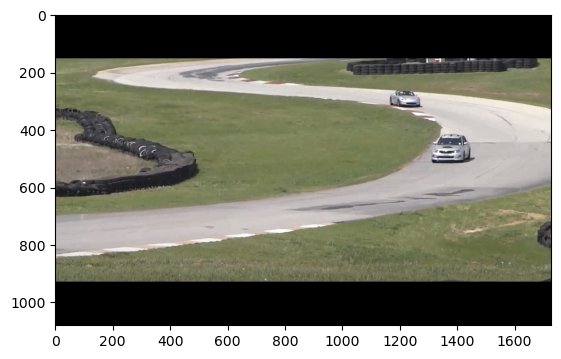

In [7]:
#plotando o primeiro frame
plt.imshow(frame[..., ::-1])

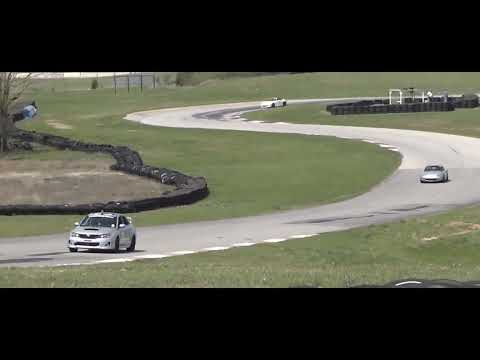

In [8]:
#mostrando o vídeo 
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

In [9]:
#recebendo a altura e a largura e passando para int
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

#criando dois objetos um para formato .avi e outro .mp4
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [10]:
#Um loop para poder passar todos os frames do vídeos para os objetos
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)
    else:
        break

In [ ]:
#Agora que os vídeos já est
cap.release()
out_avi.release()
out_mp4.release()